In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt

sa=9
%matplotlib inline

### Ejercicio

Use el metodo dbscan aplicando el algoritmo en diferentes datasets

In [ ]:
dfcan = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
dfcan.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


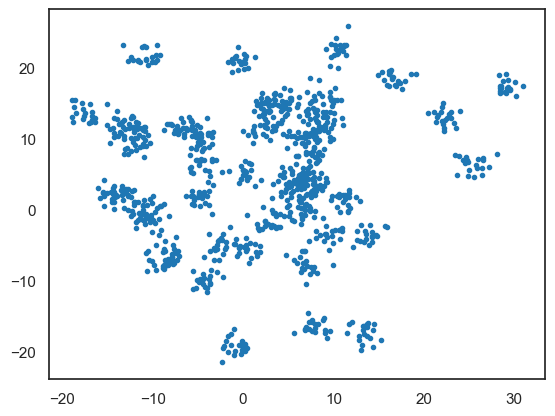

In [ ]:
plt.scatter(dfcan['x'], dfcan['y'], s=sa)
plt.show()

In [16]:
clusters= DBSCAN(eps=2, min_samples=10)
clusters.fit(dfcan)
dfcan['C']=clusters.labels_
print(f'Grupos encontrados {len(set(clusters.labels_)- set([-1]))} grupos y {(clusters.labels_==-1).sum()} puntos de ruido.') 

Grupos encontrados 15 grupos y 3 puntos de ruido.


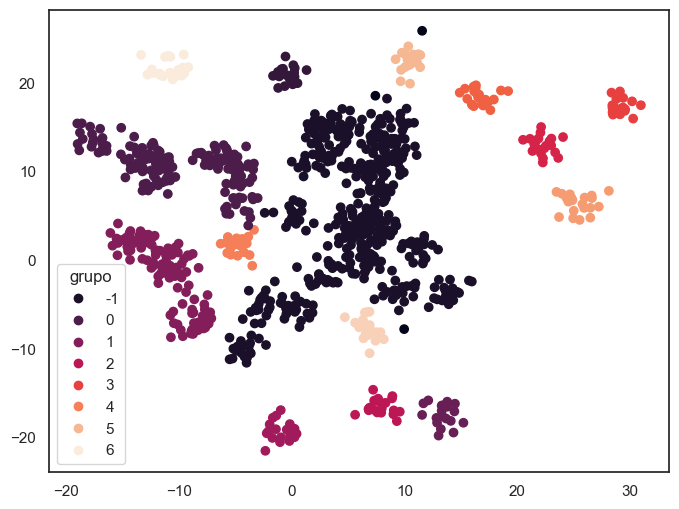

In [63]:
etiquetas= set(clusters.labels_)
neti=len(etiquetas)
cmap=plt.cm.get_cmap('brg',neti)
#dfcan.groupby(by=["C"]).plot.scatter(x='x',y='y')
fig, ax = plt.subplots(figsize=(8,6))

u, dfcan["label_num"] = np.unique(clusters.labels_, return_inverse=True)

sc = ax.scatter(x = "x", y = "y", c ="C" , data=dfcan)
ax.legend(sc.legend_elements()[0], u, title="grupo")

plt.show()
 

In [132]:
#print(clusters.labels_)

In [302]:
ruido=np.where(et==-1)[0]
print(ruido)

[ 24 198 738]


In [303]:
porcen=len(ruido)/len(et)

In [305]:
print(porcen*100)

0.3


In [13]:
print(et.shape)

(1000,)


In [15]:
c

0

In [61]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(clusters.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    for a in clusters.labels_:
        plt.scatter(
            dfcan[clusters.labels_[a] == l, 'x'],
            dfcan[clusters.labels_[a] == l, 'y'],
            c=[cmap(l) if l >= 0 else 'Black'],
            marker='ov'[l%2],
            alpha=0.75,
            s=100,
            label=f'Cluster {l}' if l >= 0 else 'Noise')
    plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

KeyError: (True, 'x')